В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Часть 1: Исследуем данные

In [2]:
data = pd.read_csv("/Student_Behaviour.csv")
data.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   DailyStudingTime      235 non-null    object 
 10  PreferToStudyIn       235 non-null    object 
 11  SalaryExpectation     235 non-null    int64  
 12  LikeDegree            235 non-null    object 
 13  CareerBasedonDegree   235 non-null    object 
 14  GamesSpendingTime     235 non-null    object 
 15  TravellingTime        2

In [4]:
data.isnull().sum()

CertificationCourses    0
Gender                  0
Department              0
Height(CM)              0
Weight(KG)              0
10Mark                  0
12Mark                  0
CollegeMark             0
Hobbies                 0
DailyStudingTime        0
PreferToStudyIn         0
SalaryExpectation       0
LikeDegree              0
CareerBasedonDegree     0
GamesSpendingTime       0
TravellingTime          0
StressLevel             0
FinancialStatus         0
PartTimeJob?            0
dtype: int64

Пропусков в колонках нет

In [5]:
data['CareerBasedonDegree'] = data['CareerBasedonDegree'].str.slice(0, -1).astype(float)

In [6]:
data.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50.0,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75.0,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50.0,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50.0,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25.0,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [7]:
type(data['CareerBasedonDegree'][0])

numpy.float64

В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлечем минимальное время(левую границу интервала) для каждой из этих переменных и переведем в минуты.

In [8]:
time = ['DailyStudingTime', 'GamesSpendingTime', 'TravellingTime ']

In [9]:
for column in time:
    print(data[column].value_counts())

30 - 60 minute      81
1 - 2 Hour          61
0 - 30 minute       46
2 - 3 hour          24
3 - 4 hour          15
More Than 4 hour     8
Name: DailyStudingTime, dtype: int64
30 - 60 Minute      69
1 - 1.30 hour       55
1 - 30 Minute       47
More than 2 hour    32
1.30 - 2 hour       27
0 Minute             5
Name: GamesSpendingTime, dtype: int64
30 - 60 minutes     80
0 - 30 minutes      55
1 - 1.30 hour       51
1.30 - 2 hour       18
2 - 2.30 hour       14
more than 3 hour    10
2.30 - 3 hour        7
Name: TravellingTime , dtype: int64


In [10]:
data['DailyStudingTime'].replace(['30 - 60 minute','1 - 2 Hour', '0 - 30 minute', '2 - 3 hour', '3 - 4 hour', 'More Than 4 hour'],[30, 60, 0, 120, 180, 240],inplace=True) 

In [11]:
data['GamesSpendingTime'].replace(['30 - 60 Minute','1 - 1.30 hour', '1 - 30 Minute', 'More than 2 hour', '1.30 - 2 hour', '0 Minute'],[30, 60, 1, 120, 90, 0],inplace=True) 

In [12]:
data['TravellingTime '].replace(['30 - 60 minutes', '0 - 30 minutes', '1 - 1.30 hour', '1.30 - 2 hour', '2 - 2.30 hour', 'more than 3 hour', '2.30 - 3 hour'],[30, 0, 60, 90, 120, 180, 150],inplace=True) 

In [13]:
for column in time:
    print(data[column].value_counts())

30     81
60     61
0      46
120    24
180    15
240     8
Name: DailyStudingTime, dtype: int64
30     69
60     55
1      47
120    32
90     27
0       5
Name: GamesSpendingTime, dtype: int64
30     80
0      55
60     51
90     18
120    14
180    10
150     7
Name: TravellingTime , dtype: int64


Колонки (непрерывные переменные) для предсказания целевой переменной с помощью knn

In [14]:
per = ['DailyStudingTime', 'GamesSpendingTime', 'TravellingTime ']

In [15]:
data.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'DailyStudingTime', 'PreferToStudyIn', 'SalaryExpectation',
       'LikeDegree', 'CareerBasedonDegree', 'GamesSpendingTime',
       'TravellingTime ', 'StressLevel ', 'FinancialStatus', 'PartTimeJob?'],
      dtype='object')

<AxesSubplot:>

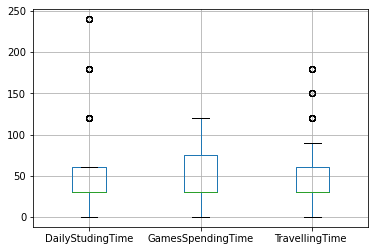

In [16]:
data.boxplot(per)

Да, выбросы присутствуют 

In [17]:
data['LikeDegree'].value_counts()

Yes    215
No      20
Name: LikeDegree, dtype: int64

В данном случае явно видет дисбаланс между классами. В этом случае можно использовоть например f1 или ROC-AUC. Нельзя использовать Accuracy.

In [18]:
data['LikeDegree'] =  data['LikeDegree'].replace(to_replace = ['Yes', 'No'], value = [1, 0])

### Часть 2: Строим модели

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[per], data['LikeDegree'], test_size = 0.3)

Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной. В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [20]:
y_naiv = np.ones(len(y_test))

все студенты довольны

Построим модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train, y_train)
predictions_3 = neigh_3.predict(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train, y_train)
predictions_5 = neigh_5.predict(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh_7 = KNeighborsClassifier(n_neighbors=7)
neigh_7.fit(X_train, y_train)
predictions_7 = neigh_7.predict(X_test)

Построим метрики качества на тестовой выборке для моделей сравним между собой.

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def metrics(pred):
    print('precision: ', precision_score(y_test, pred))
    print('recall: ', recall_score(y_test, pred))
    print('f1: ', f1_score(y_test, pred))

In [25]:
metrics(predictions_3)

precision:  0.8428571428571429
recall:  0.9833333333333333
f1:  0.9076923076923077


In [26]:
metrics(predictions_5)

precision:  0.8450704225352113
recall:  1.0
f1:  0.916030534351145


In [27]:
metrics(predictions_7)

precision:  0.8450704225352113
recall:  1.0
f1:  0.916030534351145


In [28]:
metrics(y_naiv)

precision:  0.8450704225352113
recall:  1.0
f1:  0.916030534351145


Модели с 5 и 7 соседями и наивная модель дали одиноковые наивысшие оценки точности

Применим шкалирование и снова построим модели для нескольких вариантов соседей (3, 5, 7). 

In [34]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler( )

scaler.fit(X_train) 

X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [35]:
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train_norm, y_train)
predictions_3 = neigh_3.predict(X_test_norm)
metrics(predictions_3)

precision:  0.8450704225352113
recall:  1.0
f1:  0.916030534351145


In [36]:
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train_norm, y_train)
predictions_5 = neigh_5.predict(X_test_norm)
metrics(predictions_5)

precision:  0.8450704225352113
recall:  1.0
f1:  0.916030534351145


In [37]:
neigh_7 = KNeighborsClassifier(n_neighbors=7)
neigh_7.fit(X_train_norm, y_train)
predictions_7 = neigh_7.predict(X_test_norm)
metrics(predictions_7)

precision:  0.8450704225352113
recall:  1.0
f1:  0.916030534351145


Наивысшие оценки точности теперь показывают все модели, в том числе и с 3 соседями

Избавимся от выбросов в исходной выборке.

In [50]:
for x in ['DailyStudingTime']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [51]:
for x in ['TravellingTime ']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [52]:
data = data.dropna()

In [59]:
data

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0.0,Morning,40000,0,50.0,90,30.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30.0,Morning,15000,1,75.0,60,0.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,60.0,Anytime,13000,1,50.0,120,30.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,60.0,Anytime,1500000,0,50.0,90,0.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30.0,Morning,50000,1,25.0,90,30.0,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Yes,Female,Commerce,167.0,65.0,93.0,85.0,90.0,Reading books,60.0,Night,15000,1,75.0,30,30.0,Good,good,No
227,Yes,Male,B.com ISM,167.0,55.0,55.0,57.0,60.0,Sports,30.0,Anytime,17000,1,25.0,0,0.0,Awful,Bad,No
228,Yes,Male,B.com ISM,155.0,68.0,75.0,75.0,65.0,Sports,60.0,Anytime,500,1,100.0,90,60.0,Good,good,No
229,No,Female,B.com ISM,153.0,60.0,60.0,70.0,70.0,Sports,60.0,Anytime,15000,1,75.0,60,0.0,Good,Bad,No


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[per], data['LikeDegree'], test_size = 0.3)

In [54]:
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train, y_train)
predictions_3 = neigh_3.predict(X_test)
metrics(predictions_3)

precision:  0.96
recall:  1.0
f1:  0.9795918367346939


In [55]:
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train, y_train)
predictions_5 = neigh_5.predict(X_test)
metrics(predictions_5)

precision:  0.96
recall:  1.0
f1:  0.9795918367346939


In [56]:
neigh_7 = KNeighborsClassifier(n_neighbors=7)
neigh_7.fit(X_train, y_train)
predictions_7 = neigh_7.predict(X_test)
metrics(predictions_7)

precision:  0.96
recall:  1.0
f1:  0.9795918367346939


Все три модели показывают одинаковые оценки точности. По сравнению с предыдущими качество и в правду улучшилось 

Наилучшей моделью может служить любая из моделей 6 задания. Показатель recall почти везде был максимальным, а именно 1. Это означает что все объекты первого класса мы смогли обнаружить.\
Следовательно определяющими показателями были метрики precision и f1. Они же имеют наибольшее значение в моделях из пункта 6.